In [ ]:
def plot_multi_node_charging_analysis(agent, max_steps=100, time_step=30):
    """Run a simulation and analyze multi-node charging patterns"""
    # Initialize environment
    sensors, mc = initialize_environment()
    
    # Track metrics
    steps = []
    num_nodes_charged = []
    charging_positions = []
    energy_transferred = []
    
    # Simulation loop
    state = get_state_vector(sensors, mc)
    
    for step in range(max_steps):
        valid_actions = get_valid_actions(sensors, mc)
        if not valid_actions:
            break
            
        action = agent.act(state, valid_actions)
        
        # Execute action
        if action == NUM_SENSORS:  # Return to base
            mc.move_to(300, 300)
            mc.energy = MC_CAPACITY
        else:
            # Move to target sensor
            target = sensors[action]
            mc.move_to(target.x, target.y)
            
            # Charge nodes in radius
            charged_ids, total_energy = mc.charge_nodes_in_radius(sensors)
            
            if charged_ids:  # If any nodes were charged
                steps.append(step)
                num_nodes_charged.append(len(charged_ids))
                charging_positions.append((mc.x, mc.y))
                energy_transferred.append(total_energy)
        
        # Update sensors
        for s in sensors:
            s.update_energy(time_step)
            
        # Update state
        state = get_state_vector(sensors, mc)
    
    # Create visualization
    plt.figure(figsize=(10, 8))
    
    if not steps:  # No charging events
        plt.text(0.5, 0.5, "No charging events recorded", 
                 ha='center', va='center', fontsize=14)
        plt.title("Multi-Node Charging Analysis")
        plt.show()
        return
    
    # Bar chart showing number of nodes charged at each step
    plt.bar(steps, num_nodes_charged, color='orange', alpha=0.7)
    
    # Add horizontal lines showing the average
    avg_nodes = sum(num_nodes_charged) / len(num_nodes_charged)
    plt.axhline(y=avg_nodes, color='r', linestyle='--',
               label=f'Average: {avg_nodes:.2f} nodes')
    
    # Highlight multi-node charging events
    multi_charge_steps = [s for i, s in enumerate(steps) if num_nodes_charged[i] > 1]
    multi_charge_counts = [c for c in num_nodes_charged if c > 1]
    if multi_charge_steps:
        plt.bar(multi_charge_steps, multi_charge_counts, color='green',
               label='Multi-node charging')
    
    # Add labels and legend
    plt.xlabel('Simulation Step')
    plt.ylabel('Number of Nodes Charged Simultaneously')
    plt.title('Multi-Node Charging Analysis')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Annotate the maximum
    max_idx = num_nodes_charged.index(max(num_nodes_charged))
    plt.annotate(f'Max: {max(num_nodes_charged)} nodes',
                xy=(steps[max_idx], num_nodes_charged[max_idx]),
                xytext=(steps[max_idx]+5, num_nodes_charged[max_idx]+0.5),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    # Show stats
    total_charged = sum(num_nodes_charged)
    multi_charged = sum(1 for c in num_nodes_charged if c > 1)
    multi_node_ratio = sum(c for c in num_nodes_charged if c > 1) / total_charged if total_charged else 0
    
    plt.figtext(0.5, 0.01, 
                f"Total charging events: {len(steps)}\n"
                f"Multi-node events: {multi_charged} ({multi_charged/len(steps)*100:.1f}% of events)\n"
                f"Nodes charged in multi-node mode: {multi_node_ratio*100:.1f}% of all charged nodes",
                ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

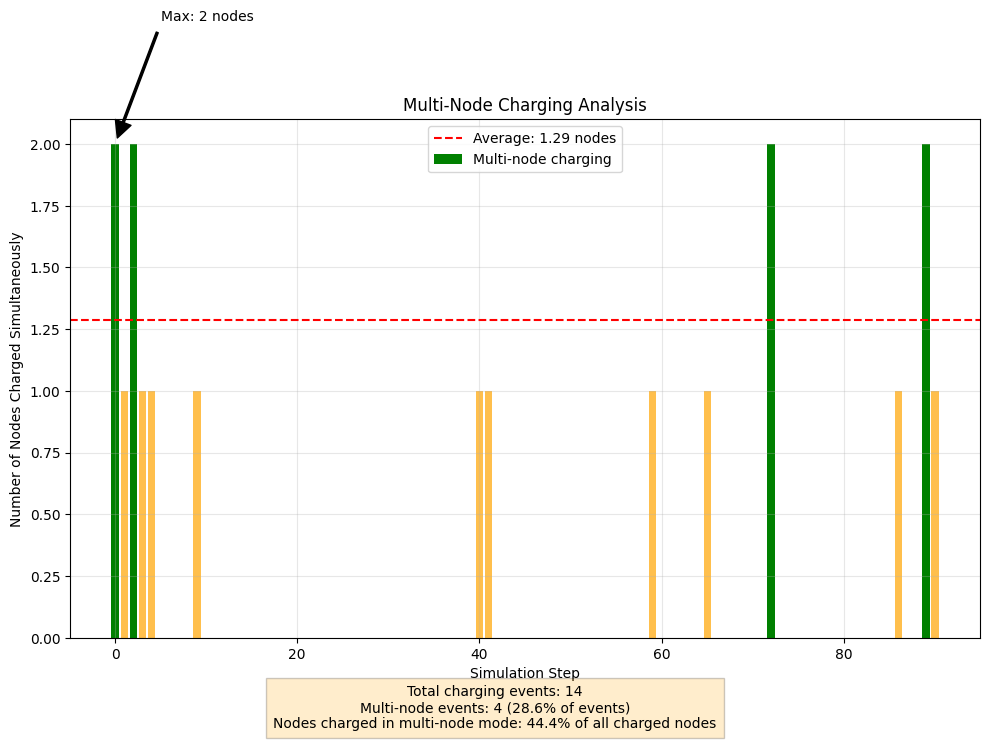

In [ ]:
# Run the multi-node charging analysis
plot_multi_node_charging_analysis(agent, max_steps=100)